<a href="https://colab.research.google.com/github/sergioGarcia91/ML_Carolina_Bays/blob/main/09_Model_metrics_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Notebook, the ML models generated in previous Notebooks will be analyzed. The goal is to evaluate their performance, compare results, and identify potential improvements. Metrics such as accuracy, loss curves, and validation scores will be examined.

# Start

In [ ]:
!pip install tables

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.9/398.9 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.1/506.1 kB 5.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import h5py
import multiprocessing
import joblib

from IPython.display import clear_output
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Change Font of the Figures

In [ ]:
!wget https://github.com/justrajdeep/fonts/raw/master/Times%20New%20Roman.ttf

--2025-03-13 13:25:31--  https://github.com/justrajdeep/fonts/raw/master/Times%20New%20Roman.ttf
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/justrajdeep/fonts/master/Times%20New%20Roman.ttf [following]
--2025-03-13 13:25:31--  https://raw.githubusercontent.com/justrajdeep/fonts/master/Times%20New%20Roman.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 834452 (815K) [application/octet-stream]
Saving to: ‘Times New Roman.ttf’

Times New Roman.ttf 100%[===================>] 814.89K  --.-KB/s    in 0.05s   

2025-03-13 13:25:31 (14.5 MB/s) - ‘Times New Roman.ttf’ saved [834452/834452]



In [ ]:
import matplotlib.font_manager as fm

In [ ]:
# Path to the custom font
font_path = 'Times New Roman.ttf'

# Add the font to the Matplotlib font manager
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)

# Get the font name to use in rcParams
font_name = font_prop.get_name()
font_name

'Times New Roman'

In [ ]:
plt.rcParams['font.family'] = font_name

# Load data

In [ ]:
os.listdir('/content/drive/MyDrive/UIS/Doctorado_UIS2198589/1_semestre/TopicosAvanzadosGeofisica/FC_CarolinaBais/Dataset_CSV')

['TRAIN_CarolinaBays_AOI_01_03.h5', 'TEST_CarolinaBays_AOI_02_04.h5']

In [ ]:
path_saveCSV = '/content/drive/MyDrive/UIS/Doctorado_UIS2198589/1_semestre/TopicosAvanzadosGeofisica/FC_CarolinaBais/Dataset_CSV'

df = pd.read_hdf(os.path.join(path_saveCSV, 'TEST_CarolinaBays_AOI_02_04.h5'), 'df')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103327744 entries, 0 to 103327743
Data columns (total 29 columns):
 #   Column  Dtype  
---  ------  -----  
 0   B1      float32
 1   B2      float32
 2   B3      float32
 3   B4      float32
 4   B5      float32
 5   B6      float32
 6   B7      float32
 7   B2_B1   float32
 8   B3_B1   float32
 9   B4_B1   float32
 10  B5_B1   float32
 11  B6_B1   float32
 12  B7_B1   float32
 13  B3_B2   float32
 14  B4_B2   float32
 15  B5_B2   float32
 16  B6_B2   float32
 17  B7_B2   float32
 18  B4_B3   float32
 19  B5_B3   float32
 20  B6_B3   float32
 21  B7_B3   float32
 22  B5_B4   float32
 23  B6_B4   float32
 24  B7_B4   float32
 25  B6_B5   float32
 26  B7_B5   float32
 27  B7_B6   float32
 28  y       float32
dtypes: float32(29)
memory usage: 11.9 GB


In [ ]:
X_ = df.iloc[:, :-1].to_numpy()
X_

array([[0.02825   , 0.04222   , 0.070765  , ..., 0.40534502, 0.27379322,
        0.3561259 ],
       [0.0218425 , 0.03144   , 0.0635875 , ..., 0.37077215, 0.24096888,
        0.35012966],
       [0.01978   , 0.0312475 , 0.0666125 , ..., 0.40308315, 0.26786673,
        0.35141206],
       ...,
       [0.0353725 , 0.0523125 , 0.137095  , ..., 0.41780737, 0.34456813,
        0.42281657],
       [0.014225  , 0.0232175 , 0.08897   , ..., 0.37447232, 0.28024402,
        0.3940848 ],
       [0.        , 0.        , 0.046565  , ..., 0.31797284, 0.19051847,
        0.33547133]], dtype=float32)

In [ ]:
y_true = df['y'].to_numpy()
y_true

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

# Load models

In [ ]:
path_models = '/content/drive/MyDrive/UIS/Doctorado_UIS2198589/1_semestre/TopicosAvanzadosGeofisica/FC_CarolinaBais/ML_models'

models_list = os.listdir(path_models)
models_list = [model for model in models_list if model.endswith('.pkl')]
models_list

['model_RegLog_002.pkl',
 'model_RegLog_003.pkl',
 'model_RegLog_004.pkl',
 'model_RegLog_005.pkl',
 'model_RegLog_006.pkl',
 'model_RegLog_007.pkl',
 'model_RegLog_008.pkl',
 'model_RegLog_009.pkl',
 'model_RegLog_010.pkl',
 'model_RegLog_001.pkl',
 'model_RegLog_011.pkl',
 'model_RegLog_012.pkl',
 'model_RegLog_013.pkl',
 'model_RegLog_014.pkl',
 'model_RegLog_015.pkl',
 'model_RegLog_016.pkl',
 'model_RegLog_017.pkl',
 'model_RegLog_018.pkl',
 'model_RegLog_019.pkl',
 'model_RegLog_020.pkl',
 'model_RegLog_021.pkl',
 'model_RegLog_022.pkl',
 'model_RegLog_023.pkl',
 'model_RegLog_024.pkl',
 'model_RegLog_025.pkl',
 'model_RegLog_026.pkl',
 'model_RegLog_027.pkl',
 'model_RegLog_028.pkl',
 'model_RegLog_029.pkl',
 'model_RegLog_030.pkl',
 'model_RandForest_001.pkl',
 'model_RandForest_002.pkl',
 'model_RandForest_003.pkl',
 'model_RandForest_004.pkl',
 'model_RandForest_005.pkl',
 'model_RandForest_006.pkl',
 'model_RandForest_007.pkl',
 'model_RandForest_008.pkl',
 'model_RandForest

# Loop

In [ ]:
y_pred.shape

(103327744,)

In [ ]:
y_true.shape

(103327744,)

In [ ]:
metrics_dict = {'Model':[],
                'TP':[],
                'TN':[],
                'FP':[],
                'FN':[],
                'Precision':[],
                'Recall':[],
                'F1':[],
                'Accuracy':[],
                'AUC':[]}

y_score_list = []
count_models = 1
total_models = len(models_list)

for model_ in models_list:
  print(f'Model {count_models} of {total_models}')
  count_models += 1

  model = joblib.load(os.path.join(path_models, model_))

  y_pred = model.predict(X_)
  y_score = model.score(X_, y_true)
  y_prob = model.predict_proba(X_)[:, 1]

  # To use in ROC
  y_score_list.append(y_score)

  # Confusion matrix
  tn_, fp_, fn_, tp_ = confusion_matrix(y_true,
                                        y_pred,
                                        normalize='all').ravel()

  # Metrics
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  accuracy = accuracy_score(y_true, y_pred)

  # AUC
  auc_score = roc_auc_score(y_true, y_prob)

  # Append data
  metrics_dict['Model'].append(model_)
  metrics_dict['TP'].append(tp_)
  metrics_dict['TN'].append(tn_)
  metrics_dict['FP'].append(fp_)
  metrics_dict['FN'].append(fn_)
  metrics_dict['Precision'].append(precision)
  metrics_dict['Recall'].append(recall)
  metrics_dict['F1'].append(f1)
  metrics_dict['Accuracy'].append(accuracy)
  metrics_dict['AUC'].append(auc_score)

Model 1 of 75
Model 2 of 75
Model 3 of 75
Model 4 of 75
Model 5 of 75
Model 6 of 75
Model 7 of 75
Model 8 of 75
Model 9 of 75
Model 10 of 75
Model 11 of 75
Model 12 of 75
Model 13 of 75
Model 14 of 75
Model 15 of 75
Model 16 of 75
Model 17 of 75
Model 18 of 75
Model 19 of 75
Model 20 of 75
Model 21 of 75
Model 22 of 75
Model 23 of 75
Model 24 of 75
Model 25 of 75
Model 26 of 75
Model 27 of 75
Model 28 of 75
Model 29 of 75
Model 30 of 75
Model 31 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.7s finished


Model 32 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.6s finished


Model 33 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   33.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.2s finished


Model 34 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.7s finished


Model 35 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.7s finished


Model 36 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.6s finished


Model 37 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   35.0s finished


Model 38 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   35.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   36.0s finished


Model 39 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   35.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.3s finished


Model 40 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   35.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   35.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   35.0s finished


Model 41 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.8s finished


Model 42 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   35.0s finished


Model 43 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.1s finished


Model 44 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.8s finished


Model 45 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.1s finished


Model 46 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.4s finished


Model 47 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   35.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.6s finished


Model 48 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   35.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   35.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   35.1s finished


Model 49 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   35.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.6s finished


Model 50 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   33.9s finished


Model 51 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.8s finished


Model 52 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   35.7s finished


Model 53 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   35.3s finished


Model 54 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.9s finished


Model 55 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.7s finished


Model 56 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.6s finished


Model 57 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   35.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.5s finished


Model 58 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   35.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   35.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   35.5s finished


Model 59 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   35.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.2s finished


Model 60 of 75


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   35.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.5s finished


Model 61 of 75
Model 62 of 75
Model 63 of 75
Model 64 of 75
Model 65 of 75
Model 66 of 75
Model 67 of 75
Model 68 of 75
Model 69 of 75
Model 70 of 75
Model 71 of 75
Model 72 of 75
Model 73 of 75
Model 74 of 75
Model 75 of 75


# Save CSV

In [ ]:
df_metrics = pd.DataFrame(metrics_dict)
df_metrics

,Model,TP,TN,FP,FN,Precision,Recall,F1,Accuracy,AUC
0,model_RegLog_002.pkl,0.059022,0.493096,0.420928,0.026955,0.122975,0.686489,0.208585,0.552118,0.647936
1,model_RegLog_003.pkl,0.059059,0.492515,0.421509,0.026917,0.122894,0.686921,0.208489,0.551574,0.647857
2,model_RegLog_004.pkl,0.058932,0.493747,0.420277,0.027045,0.122977,0.685438,0.208539,0.552678,0.647847
3,model_RegLog_005.pkl,0.058883,0.494041,0.419982,0.027093,0.122964,0.684877,0.208495,0.552924,0.647714
4,model_RegLog_006.pkl,0.058963,0.493302,0.420722,0.027013,0.122921,0.685808,0.208476,0.552265,0.647771
...,...,...,...,...,...,...,...,...,...,...
70,model_MLP_Classifier_001b.pkl,0.067204,0.360994,0.553030,0.018773,0.108353,0.781655,0.190323,0.428198,0.628750
71,model_MLP_Classifier_002b.pkl,0.051295,0.535565,0.378458,0.034682,0.119359,0.596614,0.198921,0.586860,0.630948
72,model_MLP_Classifier_003b.pkl,0.045826,0.552569,0.361454,0.040150,0.112517,0.533007,0.185811,0.598396,0.602950
73,model_MLP_Classifier_004b.pkl,0.058739,0.472783,0.441241,0.027238,0.117482,0.683196,0.200489,0.531521,0.631919


In [ ]:
df_metrics['Model'] = models_list
df_metrics

,Model,TP,TN,FP,FN,Precision,Recall,F1,Accuracy,AUC
0,model_RegLog_002.pkl,0.059022,0.493096,0.420928,0.026955,0.122975,0.686489,0.208585,0.552118,0.647936
1,model_RegLog_003.pkl,0.059059,0.492515,0.421509,0.026917,0.122894,0.686921,0.208489,0.551574,0.647857
2,model_RegLog_004.pkl,0.058932,0.493747,0.420277,0.027045,0.122977,0.685438,0.208539,0.552678,0.647847
3,model_RegLog_005.pkl,0.058883,0.494041,0.419982,0.027093,0.122964,0.684877,0.208495,0.552924,0.647714
4,model_RegLog_006.pkl,0.058963,0.493302,0.420722,0.027013,0.122921,0.685808,0.208476,0.552265,0.647771
...,...,...,...,...,...,...,...,...,...,...
70,model_MLP_Classifier_001b.pkl,0.067204,0.360994,0.553030,0.018773,0.108353,0.781655,0.190323,0.428198,0.628750
71,model_MLP_Classifier_002b.pkl,0.051295,0.535565,0.378458,0.034682,0.119359,0.596614,0.198921,0.586860,0.630948
72,model_MLP_Classifier_003b.pkl,0.045826,0.552569,0.361454,0.040150,0.112517,0.533007,0.185811,0.598396,0.602950
73,model_MLP_Classifier_004b.pkl,0.058739,0.472783,0.441241,0.027238,0.117482,0.683196,0.200489,0.531521,0.631919


In [ ]:
df_metrics.to_csv(os.path.join(path_models, 'metrics_models_test.csv'),
                  sep= ';',
                  decimal= ',',
                  index=False)

# ROC

In [ ]:
pathSavePlots = '/content/drive/MyDrive/UIS/Doctorado_UIS2198589/1_semestre/TopicosAvanzadosGeofisica/FC_CarolinaBais/Figures_Models/'

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   33.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   35.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   34.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]

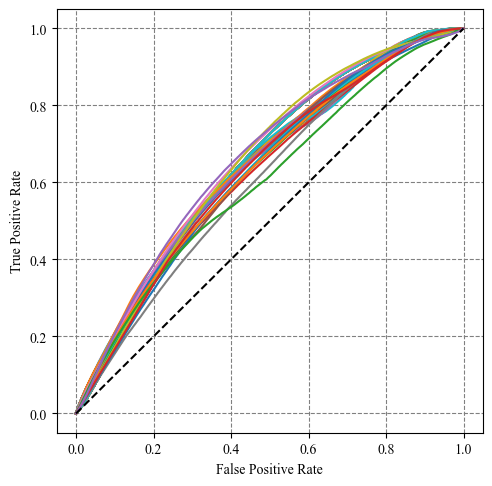

In [ ]:
y_score_list = np.array(y_score_list)

plt.figure(figsize=(5.5, 5.5))

# ROC
for model_ in models_list:
  model = joblib.load(os.path.join(path_models, model_))
  y_prob = model.predict_proba(X_)[:, 1]

  fpr, tpr, _ = roc_curve(y_true, y_prob)
  #roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(label= i)
  plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.grid(ls='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.savefig((pathSavePlots + f'ROC_.png'),
            format='png', dpi=300, bbox_inches = 'tight',pad_inches=0.25)

plt.show()

# End